In [1]:
# Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from scipy import stats as sts
import scipy.stats as sc
import forecast
from matplotlib import pyplot
import pmdarima as pm
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import HoltWintersResults

# YANA YANA

In [2]:
yanayana=pd.read_excel('SongStreamForecast.xlsx','YanaYana', index_col='Date', parse_dates=True)
yanayana

,Yana_Yana_Stream
Date,
2023-02-09,2904690
2023-02-16,2654494
2023-02-23,3135213
2023-03-02,3731357
2023-03-09,3287624
2023-03-16,3517529
2023-03-23,3569760
2023-03-30,3385034
2023-04-06,3214363


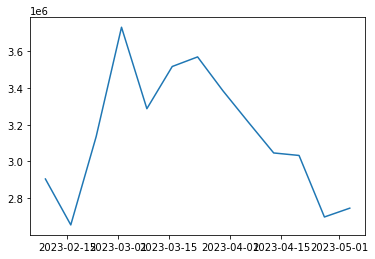

In [3]:
plt.plot(yanayana)

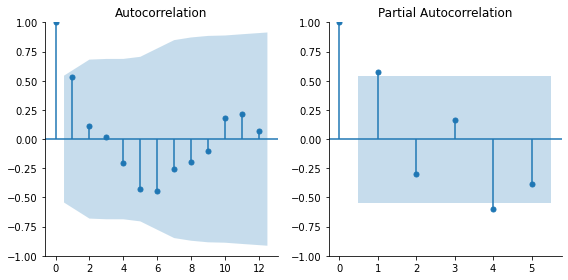

In [4]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(yanayana, lags=12, ax=ax[0])
sm.graphics.tsa.plot_pacf(yanayana, lags=5, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [6]:
from pmdarima.arima import ADFTest
adf_test=ADFTest(alpha = 0.05)
adf_test.should_diff(yanayana)

(0.01, False)

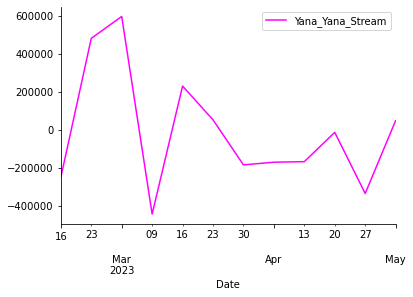

In [7]:
diff=yanayana-yanayana.shift(1)
diff=diff.dropna()
diff.plot(color='magenta')
sns.despine()
plt.show()

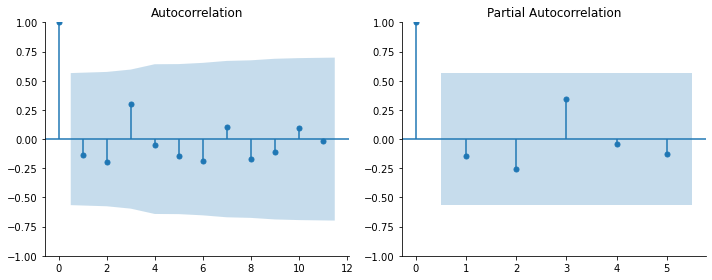

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sm.graphics.tsa.plot_acf(diff, lags=11, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff, lags=5, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [9]:
arima_model1=pm.auto_arima(yanayana,stepwise=True, seasonal=False)
arima_model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -181.155
Date:                Tue, 09 May 2023   AIC                            368.311
Time:                        16:12:46   BIC                            370.006
Sample:                    02-09-2023   HQIC                           367.962
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.216e+06   1.69e+05     19.082      0.000    2.89e+06    3.55e+06
ma.L1          0.7313      0.412      1.775      0.076      -0.076       1.539
sigma2       8.28e+10      0.155   5.35e+11      0.000    8.28e+10    8.28e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.80   Prob(JB):                         0.70
Heteroskedasticity (H):               0.60   Skew:                             0.46
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.56e+27. Standard errors may be unstable.
"""

In [10]:
h=5
forecast = arima_model1.predict(h)
forecast

2023-05-11    3.103235e+06
2023-05-18    3.216183e+06
2023-05-25    3.216183e+06
2023-06-01    3.216183e+06
2023-06-08    3.216183e+06
Freq: W-THU, dtype: float64

In [11]:
arima_model2 = sm.tsa.arima.ARIMA(yanayana, order=(0, 1, 0))  
fitted = arima_model2.fit()
fitted.summary()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Yana_Yana_Stream   No. Observations:                   13
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -168.538
Date:                Tue, 09 May 2023   AIC                            339.076
Time:                        16:12:46   BIC                            339.561
Sample:                    02-09-2023   HQIC                           338.897
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.522e+10    3.9e+10      2.187      0.029    8.85e+09    1.62e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.60   Prob(JB):                         0.60
Heteroskedasticity (H):               0.17   Skew:                             0.66
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
forecast2=fitted.predict(start=13,end=17,dynamic=True)
#yanayana[['Yana_Yana_Stream','forecast']].plot(figsize=(12,8))
#plt.plot(yanayana, label="Real")
#plt.plot(forecast, label="Predicted")
#plt.legend
forecast2

2023-05-11    2745755.0
2023-05-18    2745755.0
2023-05-25    2745755.0
2023-06-01    2745755.0
2023-06-08    2745755.0
Freq: W-THU, Name: predicted_mean, dtype: float64

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  

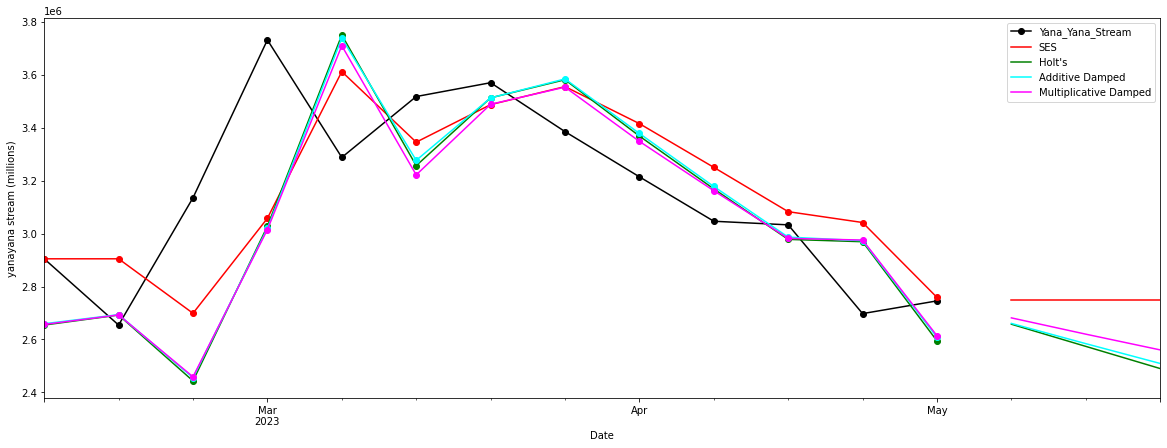

In [14]:
fit1 = SimpleExpSmoothing(yanayana).fit()
fcast1 = fit1.forecast(3).rename("SES")
fit2 = Holt(yanayana).fit()
fcast2 = fit2.forecast(3).rename("Holt's")
#fit3 = Holt(yanayana, exponential=True).fit()
#fcast3 = fit3.forecast(3).rename("Exponential")
fit4 = Holt(yanayana, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(3).rename("Additive Damped")
fit5 = Holt(yanayana, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(3).rename("Multiplicative Damped")

ax = yanayana.plot(color="black", marker="o", figsize=(20,7))
fit1.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast1.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(ax=ax, color='green', legend=True)
#fcast3.plot(ax=ax, color='blue', legend=True)
fit4.fittedvalues.plot(marker='o', ax=ax, color='cyan')
fcast4.plot(ax=ax, color='cyan', legend=True)
fit5.fittedvalues.plot(marker='o', ax=ax, color='magenta')
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('yanayana stream (millions)')
plt.show()

In [15]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","RSSE","AIC"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + np.sqrt([fit1.sse]).tolist() + [fit1.aic]
results["Holt's"] =         [fit2.params[p] for p in params] + np.sqrt([fit2.sse]).tolist() + [fit2.aic]
#results["Exponential"] =    [fit3.params[p] for p in params] + np.sqrt([fit3.sse]).tolist()+ [fit3.aic]
results["Additive"] =       [fit4.params[p] for p in params] + np.sqrt([fit4.sse]).tolist() + [fit4.aic]
results["Multiplicative"] = [fit5.params[p] for p in params] + np.sqrt([fit5.sse]).tolist() + [fit5.aic]
results.round(2)

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,0.82,0.97,NaN,0.95,1.00
$\beta$,NaN,0.19,NaN,0.18,0.14
$\phi$,NaN,NaN,NaN,0.98,0.99
$l_0$,2904690.00,2904690.00,NaN,2904690.00,2904690.00
$b_0$,NaN,-250196.00,NaN,-250196.00,0.92
RSSE,1039223.12,1224451.39,NaN,1214368.61,1209092.42
AIC,330.86,339.12,NaN,340.91,340.80


In [14]:
fcast1 = fit1.forecast(1).rename("SES")
fcast2 = fit2.forecast(1).rename("Holt's")
fcast4 = fit4.forecast(1).rename("Additive Damped")
fcast5 = fit5.forecast(1).rename("Multiplicative Damped")
print("SES forecast:", fcast1)
print("Holt's forecast:", fcast2)
print("Additive Damped forecast:", fcast4)
print("Multiplicative Damped forecast:", fcast5)

SES forecast: 2023-05-11    2.748080e+06
Freq: W-THU, Name: SES, dtype: float64
Holt's forecast: 2023-05-11    2.657681e+06
Freq: W-THU, Name: Holt's, dtype: float64
Additive Damped forecast: 2023-05-11    2.660652e+06
Freq: W-THU, Name: Additive Damped, dtype: float64
Multiplicative Damped forecast: 2023-05-11    2.681557e+06
Freq: W-THU, Name: Multiplicative Damped, dtype: float64


# BAYBAY

In [18]:
baybay=pd.read_excel('SongStreamForecast.xlsx','BayBay', index_col='Date', parse_dates=True)
baybay

,BayBay_Stream
Date,
2023-03-23,2968870
2023-03-30,3257133
2023-04-06,2950469
2023-04-13,2863233
2023-04-20,2637847
2023-04-27,2374540
2023-05-04,2434619


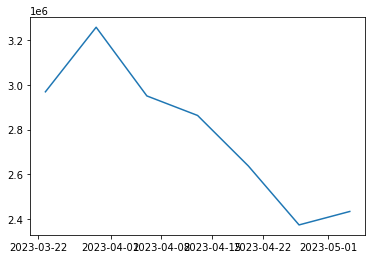

In [19]:
plt.plot(baybay)

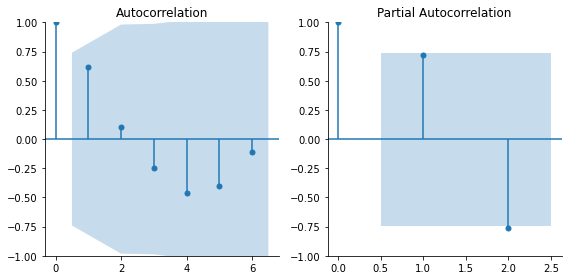

In [20]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(baybay, lags=6, ax=ax[0])
sm.graphics.tsa.plot_pacf(baybay, lags=2, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [21]:
from pmdarima.arima import ADFTest
adf_test=ADFTest(alpha = 0.05)
adf_test.should_diff(baybay)

(0.5846198552330503, True)

In [22]:
arima_model1=pm.auto_arima(baybay,stepwise=False, seasonal=False)
arima_model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    7
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.883
Date:                Tue, 09 May 2023   AIC                            205.766
Time:                        17:04:19   BIC                            205.550
Sample:                    03-23-2023   HQIC                           203.092
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9885      0.085     11.662      0.000       0.822       1.155
ma.L1         -0.0248      0.952     -0.026      0.979      -1.891       1.841
ma.L2          0.4381      1.744      0.251      0.802      -2.980       3.857
sigma2      8.616e+10   3.49e-12   2.47e+22      0.000    8.62e+10    8.62e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.45   Prob(JB):                         0.66
Heteroskedasticity (H):               0.23   Skew:                             0.35
Prob(H) (two-sided):                  0.37   Kurtosis:                         1.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.86e+39. Standard errors may be unstable.
"""

In [23]:
h=5
forecast = arima_model1.predict(h)
forecast

2023-05-11    2.332942e+06
2023-05-18    2.360126e+06
2023-05-25    2.332934e+06
2023-06-01    2.306055e+06
2023-06-08    2.279486e+06
Freq: W-THU, dtype: float64

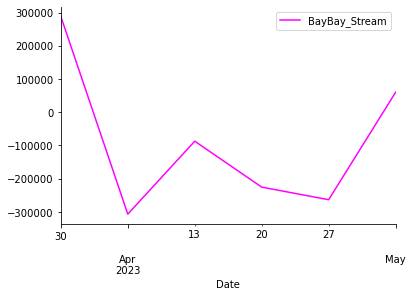

In [24]:
diff=baybay-baybay.shift(1)
diff=diff.dropna()
diff.plot(color='magenta')
sns.despine()
plt.show()

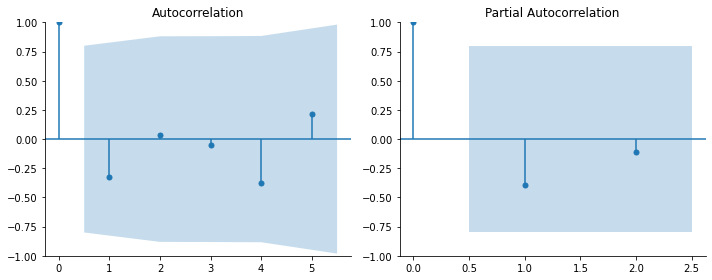

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sm.graphics.tsa.plot_acf(diff, lags=5, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff, lags=2, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [26]:
arima_model2 = sm.tsa.arima.ARIMA(baybay, order=(1, 0, 1))  
fitted = arima_model2.fit()
fitted.summary()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          BayBay_Stream   No. Observations:                    7
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -95.799
Date:                Tue, 09 May 2023   AIC                            199.598
Time:                        17:04:19   BIC                            199.382
Sample:                    03-23-2023   HQIC                           196.924
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.784e+06   2.17e+05     12.822      0.000    2.36e+06    3.21e+06
ar.L1          0.4743      0.938      0.506      0.613      -1.364       2.312
ma.L1          0.3733      0.942      0.396      0.692      -1.474       2.220
sigma2      4.203e+10      0.207   2.03e+11      0.000     4.2e+10     4.2e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.80   Prob(JB):                         0.75
Heteroskedasticity (H):               0.54   Skew:                             0.51
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.22e+27. Standard errors may be unstable.
"""

In [32]:
forecast2=fitted.predict(start=7, end=10,dynamic=True)
forecast2

2023-05-11    2.596842e+06
2023-05-18    2.695141e+06
2023-05-25    2.741760e+06
2023-06-01    2.763870e+06
Freq: W-THU, Name: predicted_mean, dtype: float64

In [28]:
fit1.summary()

Dep. Variable:,Yana_Yana_Stream,No. Observations:,13
Model:,SimpleExpSmoothing,SSE,1079984686894.437
Optimized:,True,AIC,330.859
Trend:,None,BIC,331.989
Seasonal:,None,AICC,335.859
Seasonal Periods:,None,Date:,"Tue, 09 May 2023"
Box-Cox:,False,Time:,17:04:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8223256,alpha,True
initial_level,2.9047e+06,l.0,True


C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check 

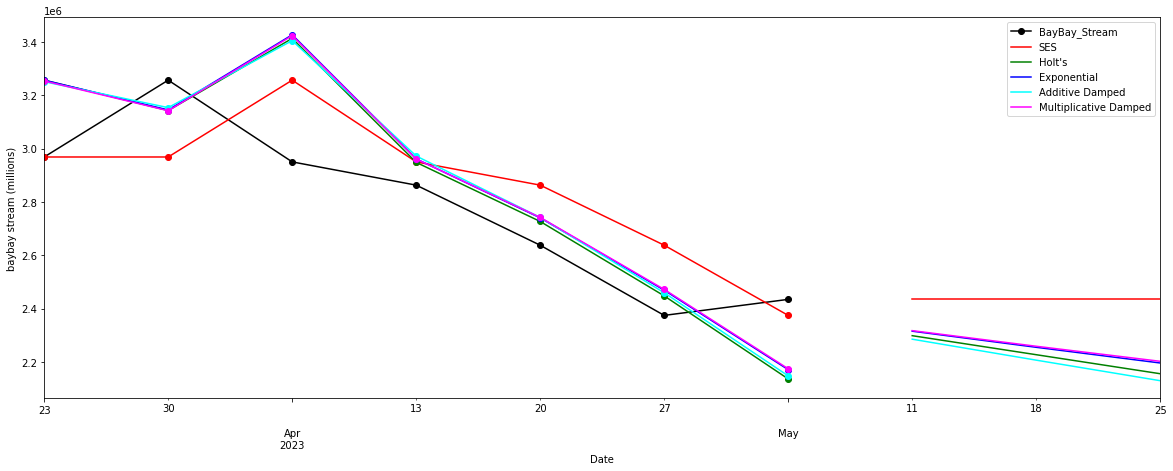

In [29]:
fit1 = SimpleExpSmoothing(baybay).fit()
fcast1 = fit1.forecast(3).rename("SES")
fit2 = Holt(baybay).fit()
fcast2 = fit2.forecast(3).rename("Holt's")
fit3 = Holt(baybay, exponential=True).fit()
fcast3 = fit3.forecast(3).rename("Exponential")
fit4 = Holt(baybay, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(3).rename("Additive Damped")
fit5 = Holt(baybay, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(3).rename("Multiplicative Damped")

ax = baybay.plot(color="black", marker="o", figsize=(20,7))
fit1.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast1.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast3.plot(ax=ax, color='blue', legend=True)
fit4.fittedvalues.plot(marker='o', ax=ax, color='cyan')
fcast4.plot(ax=ax, color='cyan', legend=True)
fit5.fittedvalues.plot(marker='o', ax=ax, color='magenta')
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('baybay stream (millions)')
plt.show()

In [30]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","RMSE","AIC"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + np.sqrt([fit1.sse]).tolist() + [fit1.aic]
results["Holt's"] =         [fit2.params[p] for p in params] + np.sqrt([fit2.sse]).tolist() + [fit2.aic]
results["Exponential"] =    [fit3.params[p] for p in params] + np.sqrt([fit3.sse]).tolist()+ [fit3.aic]
results["Additive"] =       [fit4.params[p] for p in params] + np.sqrt([fit4.sse]).tolist() + [fit4.aic]
results["Multiplicative"] = [fit5.params[p] for p in params] + np.sqrt([fit5.sse]).tolist() + [fit5.aic]
results.round(2)

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.00,0.78,0.78,0.76,0.78
$\beta$,NaN,0.78,0.78,0.76,0.78
$\phi$,NaN,NaN,NaN,0.98,0.99
$l_0$,2968870.00,2968870.00,2968870.00,2968870.00,2968870.00
$b_0$,NaN,288263.00,1.10,288263.00,1.11
RMSE,555416.42,648484.32,649410.96,640173.13,645558.71
AIC,175.56,181.73,181.75,183.55,183.67


In [31]:
fcast1 = fit1.forecast(1).rename("SES")
fcast2 = fit2.forecast(1).rename("Holt's")
fcast3 = fit3.forecast(1).rename("Exponential")
fcast4 = fit4.forecast(1).rename("Additive Damped")
fcast5 = fit5.forecast(1).rename("Multiplicative Damped")
print("SES forecast:", fcast1)
print("Holt's forecast:", fcast2)
print("Exponential:", fcast3)
print("Additive Damped forecast:", fcast4)
print("Multiplicative Damped forecast:", fcast5)

SES forecast: 2023-05-11    2.434619e+06
Freq: W-THU, Name: SES, dtype: float64
Holt's forecast: 2023-05-11    2.298429e+06
Freq: W-THU, Name: Holt's, dtype: float64
Exponential: 2023-05-11    2.315283e+06
Freq: W-THU, Name: Exponential, dtype: float64
Additive Damped forecast: 2023-05-11    2.285265e+06
Freq: W-THU, Name: Additive Damped, dtype: float64
Multiplicative Damped forecast: 2023-05-11    2.317380e+06
Freq: W-THU, Name: Multiplicative Damped, dtype: float64


# SEVECEK SANDIM

In [29]:
sevecek=pd.read_excel('SongStreamForecast.xlsx','SevecekSandim', index_col='Date', parse_dates=True)
sevecek

,Sevecek_Sandim_Streams
Date,
2022-10-27,415170
2022-11-03,427961
2022-11-10,412455
2022-11-17,410230
2022-11-24,409836
2022-12-01,446094
2022-12-08,471355
2022-12-15,504674
2022-12-22,515741


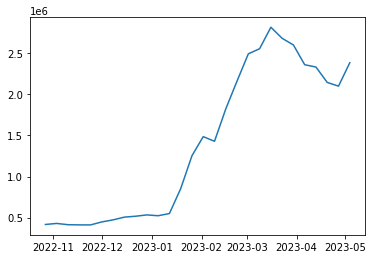

In [30]:
plt.plot(sevecek)

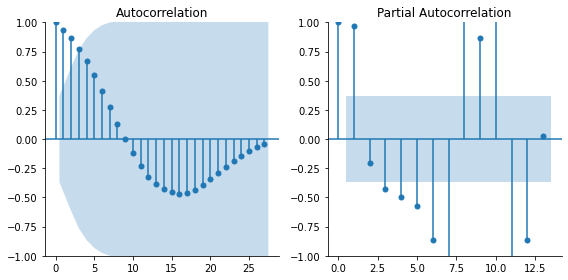

In [31]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(sevecek, lags=27, ax=ax[0])
sm.graphics.tsa.plot_pacf(sevecek, lags=13, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [32]:
from pmdarima.arima import ADFTest
adf_test=ADFTest(alpha = 0.05)
adf_test.should_diff(sevecek)

(0.39667943055327515, True)

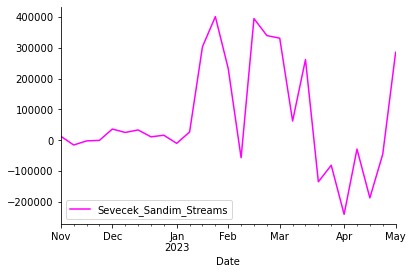

In [33]:
diff=sevecek-sevecek.shift(1)
diff=diff.dropna()
diff.plot(color='magenta')
sns.despine()
plt.show()

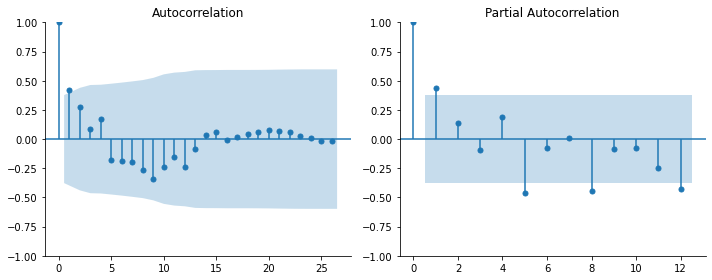

In [34]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sm.graphics.tsa.plot_acf(diff, lags=26, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff, lags=12, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [35]:
arima_model2 = sm.tsa.arima.ARIMA(sevecek, order=(1, 1, 1))  
fitted = arima_model2.fit()
fitted.summary()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Sevecek_Sandim_Streams   No. Observations:                   28
Model:                     ARIMA(1, 1, 1)   Log Likelihood                -362.837
Date:                    Tue, 09 May 2023   AIC                            731.675
Time:                            14:21:03   BIC                            735.562
Sample:                        10-27-2022   HQIC                           732.831
                             - 05-04-2023                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6509      0.260      2.501      0.012       0.141       1.161
ma.L1         -0.2773      0.340     -0.816      0.415      -0.944       0.389
sigma2      3.054e+10   4.97e-12   6.15e+21      0.000    3.05e+10    3.05e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.77   Prob(JB):                         0.62
Heteroskedasticity (H):               8.71   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.41e+38. Standard errors may be unstable.
"""

In [36]:
forecast2=fitted.predict(start=28,end=30,dynamic=True)
forecast2

2023-05-11    2.482166e+06
2023-05-18    2.544434e+06
2023-05-25    2.584966e+06
Freq: W-THU, Name: predicted_mean, dtype: float64

In [37]:
arima_model1=pm.auto_arima(sevecek,stepwise=True, seasonal=False)
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -362.998
Date:                Tue, 09 May 2023   AIC                            729.996
Time:                        14:21:03   BIC                            732.588
Sample:                    10-27-2022   HQIC                           730.767
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4534      0.164      2.767      0.006       0.132       0.774
sigma2      2.753e+10   2.07e-13   1.33e+23      0.000    2.75e+10    2.75e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.85   Prob(JB):                         0.67
Heteroskedasticity (H):               9.02   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.46e+40. Standard errors may be unstable.
"""

In [38]:
h=5
forecast = arima_model1.predict(h)
forecast

2023-05-11    2.515837e+06
2023-05-18    2.574474e+06
2023-05-25    2.601059e+06
2023-06-01    2.613112e+06
2023-06-08    2.618577e+06
Freq: W-THU, dtype: float64

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  

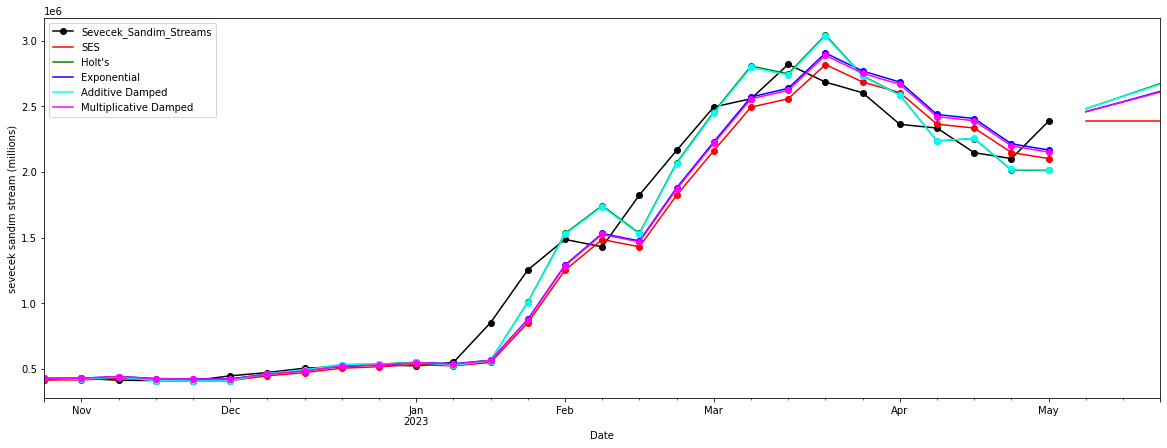

In [39]:
fit1 = SimpleExpSmoothing(sevecek).fit()
fcast1 = fit1.forecast(3).rename("SES")
fit2 = Holt(sevecek).fit()
fcast2 = fit2.forecast(3).rename("Holt's")
fit3 = Holt(sevecek, exponential=True).fit()
fcast3 = fit3.forecast(3).rename("Exponential")
fit4 = Holt(sevecek, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(3).rename("Additive Damped")
fit5 = Holt(sevecek, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(3).rename("Multiplicative Damped")

ax = sevecek.plot(color="black", marker="o", figsize=(20,7))
fit1.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast1.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast3.plot(ax=ax, color='blue', legend=True)
fit4.fittedvalues.plot(marker='o', ax=ax, color='cyan')
fcast4.plot(ax=ax, color='cyan', legend=True)
fit5.fittedvalues.plot(marker='o', ax=ax, color='magenta')
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('sevecek sandım stream (millions)')
plt.show()

In [33]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","RMSE","AIC"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + np.sqrt([fit1.sse]).tolist() + [fit1.aic]
results["Holt's"] =         [fit2.params[p] for p in params] + np.sqrt([fit2.sse]).tolist() + [fit2.aic]
results["Exponential"] =    [fit3.params[p] for p in params] + np.sqrt([fit3.sse]).tolist()+ [fit3.aic]
results["Additive"] =       [fit4.params[p] for p in params] + np.sqrt([fit4.sse]).tolist() + [fit4.aic]
results["Multiplicative"] = [fit5.params[p] for p in params] + np.sqrt([fit5.sse]).tolist() + [fit5.aic]
results.round(2)

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.00,0.78,0.78,0.76,0.78
$\beta$,NaN,0.78,0.78,0.76,0.78
$\phi$,NaN,NaN,NaN,0.98,0.99
$l_0$,2968870.00,2968870.00,2968870.00,2968870.00,2968870.00
$b_0$,NaN,288263.00,1.10,288263.00,1.11
RMSE,555416.42,648484.32,649410.96,640173.13,645558.71
AIC,175.56,181.73,181.75,183.55,183.67


In [41]:
fcast1 = fit1.forecast(1).rename("SES")
fcast2 = fit2.forecast(1).rename("Holt's")
fcast3 = fit3.forecast(1).rename("Exponential")
fcast4 = fit4.forecast(1).rename("Additive Damped")
fcast5 = fit5.forecast(1).rename("Multiplicative Damped")
print("SES forecast:", fcast1)
print("Holt's forecast:", fcast2)
print("Exponential:", fcast3)
print("Additive Damped forecast:", fcast4)
print("Multiplicative Damped forecast:", fcast5)

SES forecast: 2023-05-11    2.385083e+06
Freq: W-THU, Name: SES, dtype: float64
Holt's forecast: 2023-05-11    2.480736e+06
Freq: W-THU, Name: Holt's, dtype: float64
Exponential: 2023-05-11    2.459186e+06
Freq: W-THU, Name: Exponential, dtype: float64
Additive Damped forecast: 2023-05-11    2.480638e+06
Freq: W-THU, Name: Additive Damped, dtype: float64
Multiplicative Damped forecast: 2023-05-11    2.458160e+06
Freq: W-THU, Name: Multiplicative Damped, dtype: float64


# DİYARDAN DİYARA

In [47]:
diyar=pd.read_excel('SongStreamForecast.xlsx','DiyardanDiyara', index_col='Date', parse_dates=True)
diyar

,Diyardan_Diyara_Stream
Date,
2022-12-29,1311277
2023-01-05,1132238
2023-01-12,1120022
2023-01-19,1351991
2023-01-26,1371162
2023-02-02,1756117
2023-02-09,1709026
2023-02-16,1923921
2023-02-23,2196250


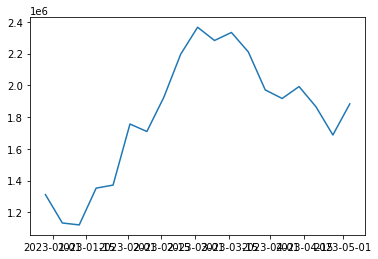

In [48]:
plt.plot(diyar)

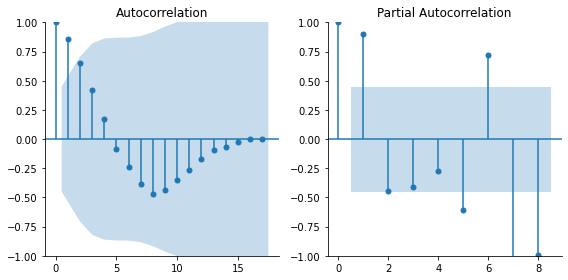

In [49]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(diyar, lags=17, ax=ax[0])
sm.graphics.tsa.plot_pacf(diyar, lags=8, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

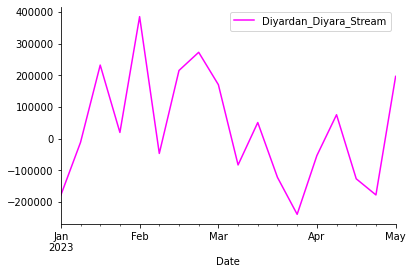

In [51]:
diff=diyar-diyar.shift(1)
diff=diff.dropna()
diff.plot(color='magenta')
sns.despine()
plt.show()

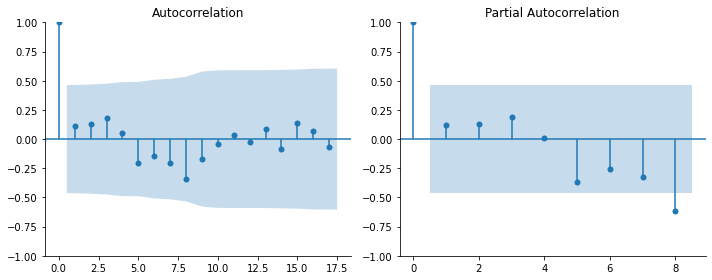

In [52]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sm.graphics.tsa.plot_acf(diff, lags=17, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff, lags=8, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [53]:
arima_model2 = sm.tsa.arima.ARIMA(diyar, order=(1, 1, 1))  
fitted = arima_model2.fit()
fitted.summary()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Diyardan_Diyara_Stream   No. Observations:                   19
Model:                     ARIMA(1, 1, 1)   Log Likelihood                -242.860
Date:                    Tue, 09 May 2023   AIC                            491.720
Time:                            20:38:28   BIC                            494.391
Sample:                        12-29-2022   HQIC                           492.088
                             - 05-04-2023                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1461      2.511     -0.058      0.954      -5.068       4.776
ma.L1          0.0762      2.522      0.030      0.976      -4.868       5.020
sigma2      2.977e+10   3.78e-10   7.87e+19      0.000    2.98e+10    2.98e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.41   Prob(JB):                         0.65
Heteroskedasticity (H):               0.73   Skew:                             0.32
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.11e+35. Standard errors may be unstable.
"""

In [54]:
forecast2=fitted.predict(start=19,end=22,dynamic=True)
forecast2

2023-05-11    1.868537e+06
2023-05-18    1.870675e+06
2023-05-25    1.870362e+06
2023-06-01    1.870408e+06
Freq: W-THU, Name: predicted_mean, dtype: float64

In [41]:
arima_model1=pm.auto_arima(diyar,stepwise=False, seasonal=False)
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -258.593
Date:                Tue, 09 May 2023   AIC                            523.187
Time:                        20:24:00   BIC                            526.020
Sample:                    12-29-2022   HQIC                           523.666
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9930      0.022     45.271      0.000       0.950       1.036
ma.L1          0.1180      0.310      0.381      0.703      -0.490       0.726
sigma2        3.1e+10      2e-13   1.55e+23      0.000     3.1e+10     3.1e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.04
Prob(Q):                              0.81   Prob(JB):                         0.59
Heteroskedasticity (H):               0.54   Skew:                             0.28
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.84e+39. Standard errors may be unstable.
"""

In [42]:
h=5
forecast = arima_model1.predict(h)
forecast

2023-05-11    1.896719e+06
2023-05-18    1.883532e+06
2023-05-25    1.870438e+06
2023-06-01    1.857434e+06
2023-06-08    1.844520e+06
Freq: W-THU, dtype: float64

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  

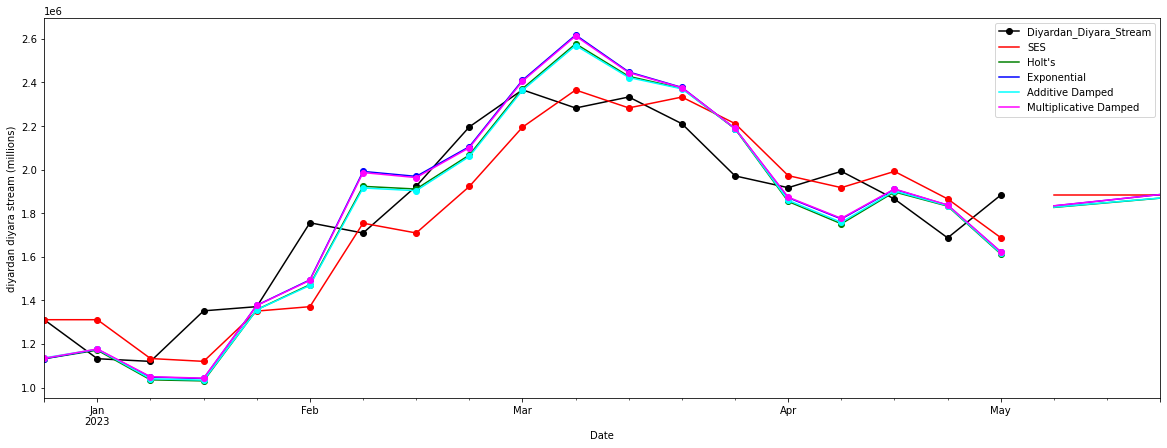

In [43]:
fit1 = SimpleExpSmoothing(diyar).fit()
fcast1 = fit1.forecast(3).rename("SES")
fit2 = Holt(diyar).fit()
fcast2 = fit2.forecast(3).rename("Holt's")
fit3 = Holt(diyar, exponential=True).fit()
fcast3 = fit3.forecast(3).rename("Exponential")
fit4 = Holt(diyar, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(3).rename("Additive Damped")
fit5 = Holt(diyar, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(3).rename("Multiplicative Damped")

ax = diyar.plot(color="black", marker="o", figsize=(20,7))
fit1.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast1.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast3.plot(ax=ax, color='blue', legend=True)
fit4.fittedvalues.plot(marker='o', ax=ax, color='cyan')
fcast4.plot(ax=ax, color='cyan', legend=True)
fit5.fittedvalues.plot(marker='o', ax=ax, color='magenta')
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('diyardan diyara stream (millions)')
plt.show()

In [55]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","RMSE","AIC"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + np.sqrt([fit1.sse]).tolist() + [fit1.aic]
results["Holt's"] =         [fit2.params[p] for p in params] + np.sqrt([fit2.sse]).tolist() + [fit2.aic]
results["Exponential"] =    [fit3.params[p] for p in params] + np.sqrt([fit3.sse]).tolist() + [fit3.aic]
results["Additive"] =       [fit4.params[p] for p in params] + np.sqrt([fit4.sse]).tolist() + [fit4.aic]
results["Multiplicative"] = [fit5.params[p] for p in params] + np.sqrt([fit5.sse]).tolist() + [fit5.aic]
results.round(2)

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.00,0.71,0.71,0.71,0.71
$\beta$,NaN,0.71,0.71,0.71,0.71
$\phi$,NaN,NaN,NaN,0.98,0.99
$l_0$,1311277.00,1311277.00,1311277.00,1311277.00,1311277.00
$b_0$,NaN,-179039.00,0.86,-179039.00,0.87
RMSE,750859.48,783546.61,799480.18,775123.54,793809.11
AIC,462.16,467.78,468.54,469.37,470.27


In [56]:
fcast1 = fit1.forecast(1).rename("SES")
fcast2 = fit2.forecast(1).rename("Holt's")
fcast3 = fit3.forecast(1).rename("Exponential")
fcast4 = fit4.forecast(1).rename("Additive Damped")
fcast5 = fit5.forecast(1).rename("Multiplicative Damped")
print("SES forecast:", fcast1)
print("Holt's forecast:", fcast2)
print("Exponential:", fcast3)
print("Additive Damped forecast:", fcast4)
print("Multiplicative Damped forecast:", fcast5)

SES forecast: 2023-05-11    1.882189e+06
Freq: W-THU, Name: SES, dtype: float64
Holt's forecast: 2023-05-11    1.826651e+06
Freq: W-THU, Name: Holt's, dtype: float64
Exponential: 2023-05-11    1.833584e+06
Freq: W-THU, Name: Exponential, dtype: float64
Additive Damped forecast: 2023-05-11    1.827789e+06
Freq: W-THU, Name: Additive Damped, dtype: float64
Multiplicative Damped forecast: 2023-05-11    1.834088e+06
Freq: W-THU, Name: Multiplicative Damped, dtype: float64


# Bİ TEK BEN ANLARIM

In [57]:
bitekben=pd.read_excel('SongStreamForecast.xlsx','BiTekBenAnlarim', index_col='Date', parse_dates=True)
bitekben

,BiTekBenAnlarim_Stream
Date,
2022-03-24,298749
2022-03-31,423425
2022-04-07,707055
2022-04-14,843333
2022-04-21,976706
2022-04-28,1103987
2022-05-05,1100348
2022-05-12,1256599
2022-05-19,1389185


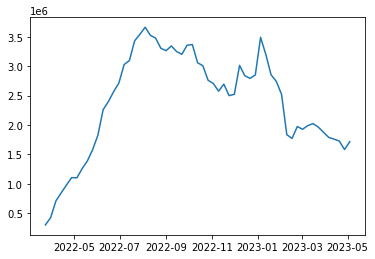

In [58]:
plt.plot(bitekben)

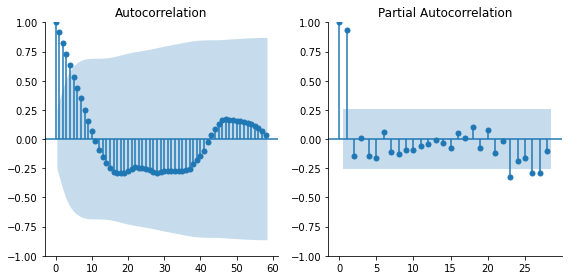

In [59]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(bitekben, lags=58, ax=ax[0])
sm.graphics.tsa.plot_pacf(bitekben, lags=28, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

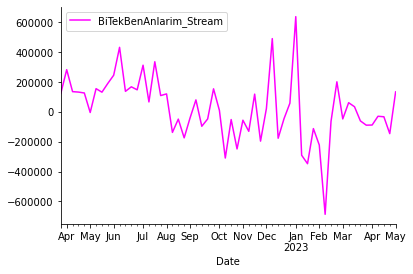

In [60]:
diff=bitekben-bitekben.shift(1)
diff=diff.dropna()
diff.plot(color='magenta')
sns.despine()
plt.show()

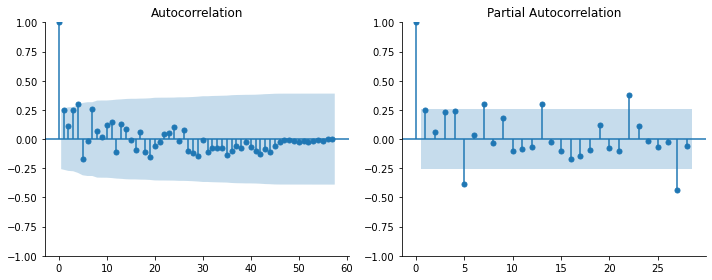

In [61]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sm.graphics.tsa.plot_acf(diff, lags=57, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff, lags=28, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [62]:
arima_model2 = sm.tsa.arima.ARIMA(bitekben, order=(1, 1, 1))  
fitted = arima_model2.fit()
fitted.summary()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     BiTekBenAnlarim_Stream   No. Observations:                   59
Model:                     ARIMA(1, 1, 1)   Log Likelihood                -790.770
Date:                    Tue, 09 May 2023   AIC                           1587.540
Time:                            20:44:17   BIC                           1593.721
Sample:                        03-24-2022   HQIC                          1589.948
                             - 05-04-2023                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8909      0.171      5.205      0.000       0.555       1.226
ma.L1         -0.7301      0.222     -3.287      0.001      -1.165      -0.295
sigma2      4.371e+10   3.27e-12   1.34e+22      0.000    4.37e+10    4.37e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                10.66
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.13   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+40. Standard errors may be unstable.
"""

In [63]:
forecast2=fitted.predict(start=59,end=62,dynamic=True)
forecast2

2023-05-11    1.706373e+06
2023-05-18    1.697500e+06
2023-05-25    1.689596e+06
2023-06-01    1.682553e+06
Freq: W-THU, Name: predicted_mean, dtype: float64

In [64]:
arima_model1=pm.auto_arima(bitekben,stepwise=True, seasonal=False)
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -806.482
Date:                Tue, 09 May 2023   AIC                           1620.963
Time:                        20:44:18   BIC                           1629.274
Sample:                    03-24-2022   HQIC                          1624.207
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9938      0.011    177.929      0.000       1.972       2.016
ar.L2         -0.9955      0.012    -86.398      0.000      -1.018      -0.973
ma.L1         -0.9862      0.162     -6.072      0.000      -1.305      -0.668
sigma2       4.34e+10   3.71e-12   1.17e+22      0.000    4.34e+10    4.34e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                18.29
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               3.23   Skew:                             0.23
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.57e+37. Standard errors may be unstable.
"""

In [65]:
h=5
forecast = arima_model1.predict(h)
forecast

2023-05-11    1.613414e+06
2023-05-18    1.508300e+06
2023-05-25    1.401174e+06
2023-06-01    1.292221e+06
2023-06-08    1.181629e+06
Freq: W-THU, dtype: float64

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  

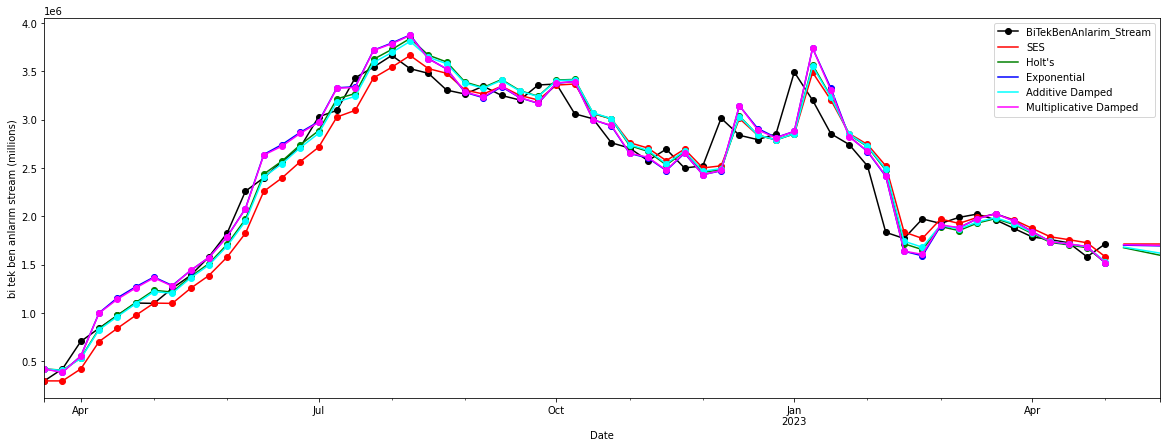

In [66]:
fit1 = SimpleExpSmoothing(bitekben).fit()
fcast1 = fit1.forecast(3).rename("SES")
fit2 = Holt(bitekben).fit()
fcast2 = fit2.forecast(3).rename("Holt's")
fit3 = Holt(bitekben, exponential=True).fit()
fcast3 = fit3.forecast(3).rename("Exponential")
fit4 = Holt(bitekben, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(3).rename("Additive Damped")
fit5 = Holt(bitekben, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(3).rename("Multiplicative Damped")

ax = bitekben.plot(color="black", marker="o", figsize=(20,7))
fit1.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast1.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast3.plot(ax=ax, color='blue', legend=True)
fit4.fittedvalues.plot(marker='o', ax=ax, color='cyan')
fcast4.plot(ax=ax, color='cyan', legend=True)
fit5.fittedvalues.plot(marker='o', ax=ax, color='magenta')
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('bi tek ben anlarım stream (millions)')
plt.show()

In [68]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","RMSE","AIC"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + np.sqrt([fit1.sse]).tolist() + [fit1.aic]
results["Holt's"] =         [fit2.params[p] for p in params] + np.sqrt([fit2.sse]).tolist() + [fit2.aic]
results["Exponential"] =    [fit3.params[p] for p in params] + np.sqrt([fit3.sse]).tolist() + [fit3.aic]
results["Additive"] =       [fit4.params[p] for p in params] + np.sqrt([fit4.sse]).tolist() + [fit4.aic]
results["Multiplicative"] = [fit5.params[p] for p in params] + np.sqrt([fit5.sse]).tolist() + [fit5.aic]
results.round(2)

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.00,1.00,0.95,1.00,0.97
$\beta$,NaN,0.12,0.35,0.09,0.32
$\phi$,NaN,NaN,NaN,0.98,0.99
$l_0$,298749.00,298749.00,298749.00,298749.00,298749.00
$b_0$,NaN,124676.00,1.42,124676.00,1.43
RMSE,1630916.04,1564123.71,1683462.94,1545499.19,1666508.23
AIC,1451.37,1450.44,1459.12,1451.03,1459.92


In [69]:
fcast1 = fit1.forecast(1).rename("SES")
fcast2 = fit2.forecast(1).rename("Holt's")
fcast3 = fit3.forecast(1).rename("Exponential")
fcast4 = fit4.forecast(1).rename("Additive Damped")
fcast5 = fit5.forecast(1).rename("Multiplicative Damped")
print("SES forecast:", fcast1)
print("Holt's forecast:", fcast2)
print("Exponential:", fcast3)
print("Additive Damped forecast:", fcast4)
print("Multiplicative Damped forecast:", fcast5)

SES forecast: 2023-05-11    1.715663e+06
Freq: W-THU, Name: SES, dtype: float64
Holt's forecast: 2023-05-11    1.676200e+06
Freq: W-THU, Name: Holt's, dtype: float64
Exponential: 2023-05-11    1.702485e+06
Freq: W-THU, Name: Exponential, dtype: float64
Additive Damped forecast: 2023-05-11    1.682967e+06
Freq: W-THU, Name: Additive Damped, dtype: float64
Multiplicative Damped forecast: 2023-05-11    1.707148e+06
Freq: W-THU, Name: Multiplicative Damped, dtype: float64


# SENİN UĞRUNA

In [70]:
ugruna=pd.read_excel('SongStreamForecast.xlsx','SeninUgruna', index_col='Date', parse_dates=True)
ugruna

,Senin_Ugruna_Streams
Date,
2022-09-15,1624357
2022-09-22,2943171
2022-09-29,4280646
2022-10-06,4503159
2022-10-13,4261357
2022-10-20,4161658
2022-10-27,3817321
2022-11-03,3489546
2022-11-10,3178167


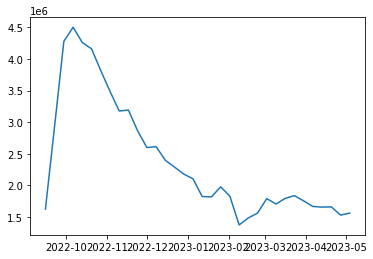

In [71]:
plt.plot(ugruna)

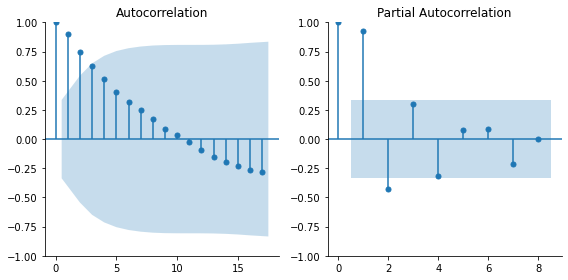

In [72]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(ugruna, lags=17, ax=ax[0])
sm.graphics.tsa.plot_pacf(ugruna, lags=8, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

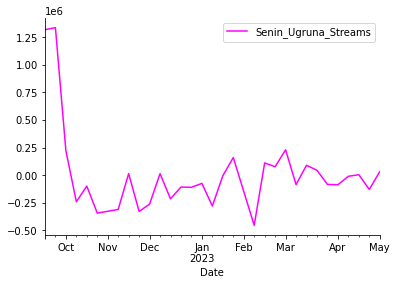

In [73]:
diff=ugruna-ugruna.shift(1)
diff=diff.dropna()
diff.plot(color='magenta')
sns.despine()
plt.show()

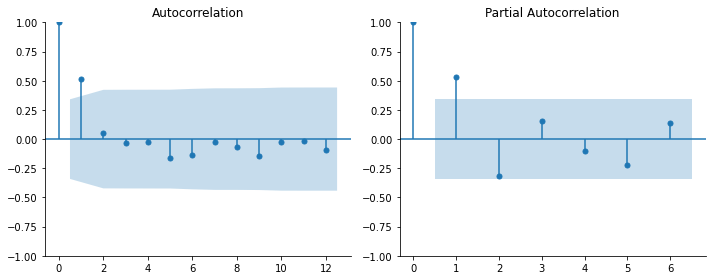

In [74]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sm.graphics.tsa.plot_acf(diff, lags=12, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff, lags=6, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [75]:
arima_model2 = sm.tsa.arima.ARIMA(ugruna, order=(3, 1, 0))  
fitted = arima_model2.fit()
fitted.summary()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Senin_Ugruna_Streams   No. Observations:                   34
Model:                   ARIMA(3, 1, 0)   Log Likelihood                -456.920
Date:                  Tue, 09 May 2023   AIC                            921.841
Time:                          20:55:14   BIC                            927.827
Sample:                      09-15-2022   HQIC                           923.855
                           - 05-04-2023                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6205      0.069      9.003      0.000       0.485       0.756
ar.L2          0.0921      0.090      1.024      0.306      -0.084       0.268
ar.L3         -0.1556      0.068     -2.296      0.022      -0.288      -0.023
sigma2      3.217e+10   1.03e-12   3.12e+22      0.000    3.22e+10    3.22e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.26   Prob(JB):                         0.80
Heteroskedasticity (H):               0.13   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+38. Standard errors may be unstable.
"""

In [76]:
forecast2=fitted.predict(start=34,end=37,dynamic=True)
forecast2

2023-05-11    1.568012e+06
2023-05-18    1.595351e+06
2023-05-25    1.608085e+06
2023-06-01    1.617442e+06
Freq: W-THU, Name: predicted_mean, dtype: float64

In [77]:
arima_model1=pm.auto_arima(ugruna,stepwise=True, seasonal=False)
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -455.118
Date:                Tue, 09 May 2023   AIC                            914.237
Time:                        20:55:16   BIC                            917.230
Sample:                    09-15-2022   HQIC                           915.244
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6229      0.044     14.137      0.000       0.537       0.709
sigma2      5.285e+10   3.38e-14   1.56e+24      0.000    5.29e+10    5.29e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.36   Prob(JB):                         0.99
Heteroskedasticity (H):               0.13   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.44e+41. Standard errors may be unstable.
"""

In [78]:
h=5
forecast = arima_model1.predict(h)
forecast

2023-05-11    1.580630e+06
2023-05-18    1.592744e+06
2023-05-25    1.600289e+06
2023-06-01    1.604989e+06
2023-06-08    1.607917e+06
Freq: W-THU, dtype: float64

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  

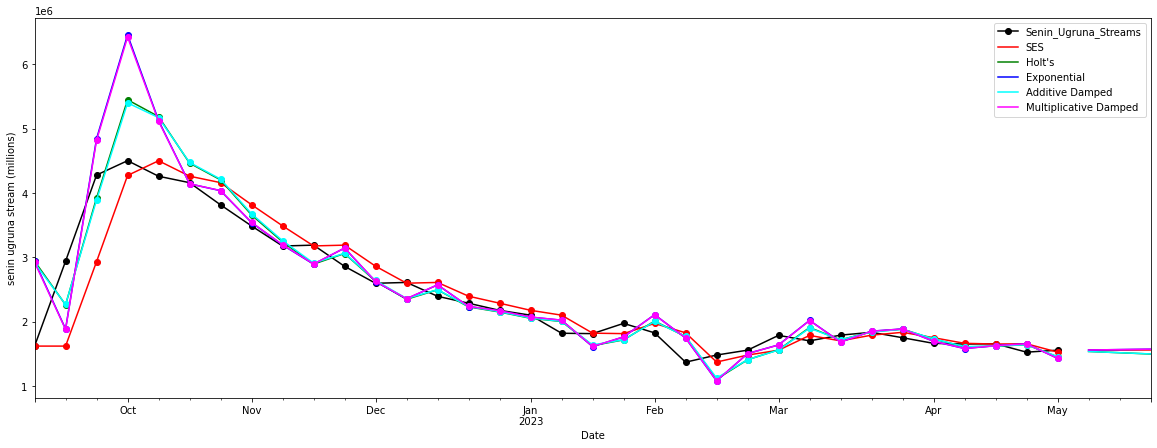

In [79]:
fit1 = SimpleExpSmoothing(ugruna).fit()
fcast1 = fit1.forecast(3).rename("SES")
fit2 = Holt(ugruna).fit()
fcast2 = fit2.forecast(3).rename("Holt's")
fit3 = Holt(ugruna, exponential=True).fit()
fcast3 = fit3.forecast(3).rename("Exponential")
fit4 = Holt(ugruna, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(3).rename("Additive Damped")
fit5 = Holt(ugruna, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(3).rename("Multiplicative Damped")

ax = ugruna.plot(color="black", marker="o", figsize=(20,7))
fit1.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast1.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast3.plot(ax=ax, color='blue', legend=True)
fit4.fittedvalues.plot(marker='o', ax=ax, color='cyan')
fcast4.plot(ax=ax, color='cyan', legend=True)
fit5.fittedvalues.plot(marker='o', ax=ax, color='magenta')
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('senin ugruna stream (millions)')
plt.show()

In [80]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","RMSE","AIC"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + np.sqrt([fit1.sse]).tolist() + [fit1.aic]
results["Holt's"] =         [fit2.params[p] for p in params] + np.sqrt([fit2.sse]).tolist() + [fit2.aic]
results["Exponential"] =    [fit3.params[p] for p in params] + np.sqrt([fit3.sse]).tolist() + [fit3.aic]
results["Additive"] =       [fit4.params[p] for p in params] + np.sqrt([fit4.sse]).tolist() + [fit4.aic]
results["Multiplicative"] = [fit5.params[p] for p in params] + np.sqrt([fit5.sse]).tolist() + [fit5.aic]
results.round(2)

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.00,1.00,0.97,1.00,0.97
$\beta$,NaN,0.52,0.86,0.50,0.86
$\phi$,NaN,NaN,NaN,0.98,0.99
$l_0$,1624357.00,1624357.00,1624357.00,1624357.00,1624357.00
$b_0$,NaN,1318814.00,1.81,1318814.00,1.82
RMSE,2168106.81,2280227.57,2958543.20,2241158.75,2921682.03
AIC,876.18,883.61,901.32,884.43,902.47


In [81]:
fcast1 = fit1.forecast(1).rename("SES")
fcast2 = fit2.forecast(1).rename("Holt's")
fcast3 = fit3.forecast(1).rename("Exponential")
fcast4 = fit4.forecast(1).rename("Additive Damped")
fcast5 = fit5.forecast(1).rename("Multiplicative Damped")
print("SES forecast:", fcast1)
print("Holt's forecast:", fcast2)
print("Exponential:", fcast3)
print("Additive Damped forecast:", fcast4)
print("Multiplicative Damped forecast:", fcast5)

SES forecast: 2023-05-11    1.561029e+06
Freq: W-THU, Name: SES, dtype: float64
Holt's forecast: 2023-05-11    1.540997e+06
Freq: W-THU, Name: Holt's, dtype: float64
Exponential: 2023-05-11    1.563809e+06
Freq: W-THU, Name: Exponential, dtype: float64
Additive Damped forecast: 2023-05-11    1.541099e+06
Freq: W-THU, Name: Additive Damped, dtype: float64
Multiplicative Damped forecast: 2023-05-11    1.563935e+06
Freq: W-THU, Name: Multiplicative Damped, dtype: float64


# YAKALARSAN

In [82]:
yakalarsan=pd.read_excel('SongStreamForecast.xlsx','Yakalarsan', index_col='Date', parse_dates=True)
yakalarsan

,Yakalarsan_Streams
Date,
2023-04-06,1558254
2023-04-13,1535066
2023-04-20,1475110
2023-04-27,1362884
2023-05-04,1112790


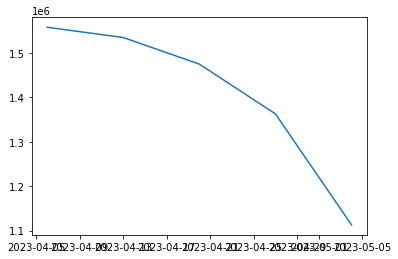

In [83]:
plt.plot(yakalarsan)

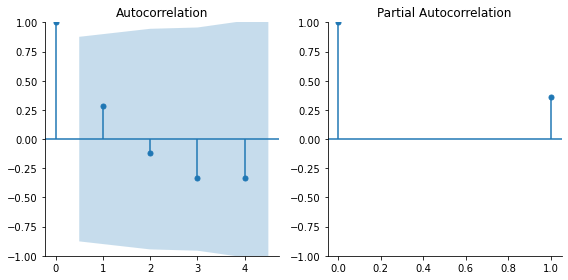

In [84]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(yakalarsan, lags=4, ax=ax[0])
sm.graphics.tsa.plot_pacf(yakalarsan, lags=1, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

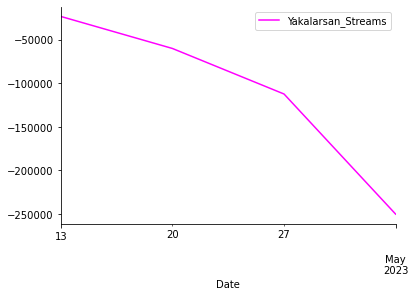

In [85]:
diff=yakalarsan-yakalarsan.shift(1)
diff=diff.dropna()
diff.plot(color='magenta')
sns.despine()
plt.show()

In [86]:
arima_model2 = sm.tsa.arima.ARIMA(yakalarsan, order=(0, 1, 1))  
fitted = arima_model2.fit()
fitted.summary()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Yakalarsan_Streams   No. Observations:                    5
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -54.474
Date:                Tue, 09 May 2023   AIC                            112.949
Time:                        21:09:11   BIC                            111.721
Sample:                    04-06-2023   HQIC                           110.255
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1       2.605e-05      0.160      0.000      1.000      -0.314       0.314
sigma2      7.416e+09   9.19e-12   8.07e+20      0.000    7.42e+09    7.42e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.66   Prob(JB):                         0.77
Heteroskedasticity (H):                nan   Skew:                            -0.72
Prob(H) (two-sided):                   nan   Kurtosis:                         1.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.01e+36. Standard errors may be unstable.
"""

In [87]:
forecast2=fitted.predict(start=5,end=7,dynamic=True)
forecast2

2023-05-11    1.112783e+06
2023-05-18    1.112783e+06
2023-05-25    1.112783e+06
Freq: W-THU, Name: predicted_mean, dtype: float64

In [88]:
arima_model1=pm.auto_arima(yakalarsan,stepwise=False, seasonal=False)
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    5
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -75.800
Date:                Tue, 09 May 2023   AIC                            155.600
Time:                        21:09:12   BIC                            154.819
Sample:                    04-06-2023   HQIC                           153.504
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8935      2.387      0.374      0.708      -3.785       5.572
sigma2      7.938e+11   3.82e-12   2.08e+23      0.000    7.94e+11    7.94e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.58   Prob(JB):                         0.70
Heteroskedasticity (H):               0.39   Skew:                             0.81
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.46e+39. Standard errors may be unstable.
"""

In [89]:
h=2
forecast = arima_model1.predict(h)
forecast

2023-05-11    494855.167762
2023-05-18         0.000000
Freq: W-THU, dtype: float64

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  

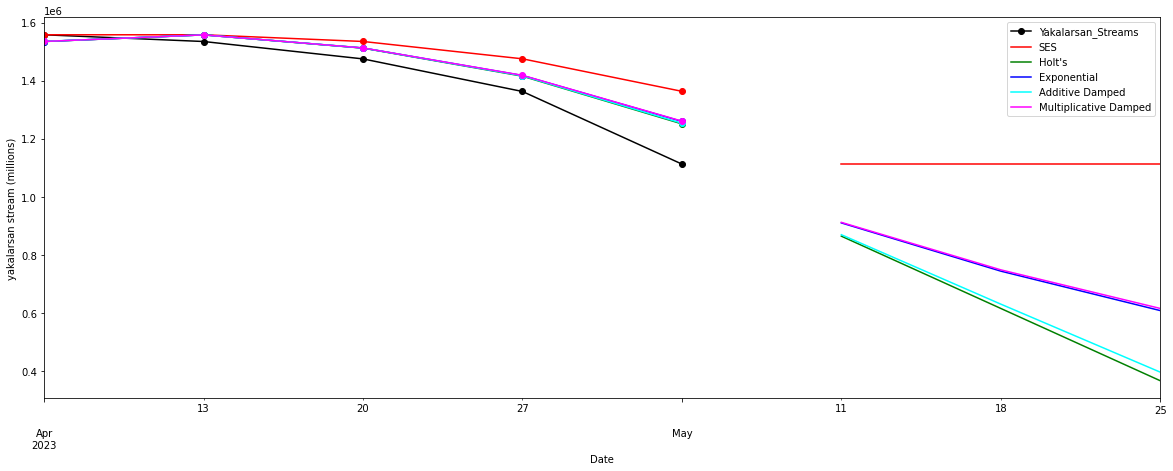

In [90]:
fit1 = SimpleExpSmoothing(yakalarsan).fit()
fcast1 = fit1.forecast(3).rename("SES")
fit2 = Holt(yakalarsan).fit()
fcast2 = fit2.forecast(3).rename("Holt's")
fit3 = Holt(yakalarsan, exponential=True).fit()
fcast3 = fit3.forecast(3).rename("Exponential")
fit4 = Holt(yakalarsan, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(3).rename("Additive Damped")
fit5 = Holt(yakalarsan, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(3).rename("Multiplicative Damped")

ax = yakalarsan.plot(color="black", marker="o", figsize=(20,7))
fit1.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast1.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast3.plot(ax=ax, color='blue', legend=True)
fit4.fittedvalues.plot(marker='o', ax=ax, color='cyan')
fcast4.plot(ax=ax, color='cyan', legend=True)
fit5.fittedvalues.plot(marker='o', ax=ax, color='magenta')
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('yakalarsan stream (millions)')
plt.show()

In [93]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","RMSE","AIC"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + np.sqrt([fit1.sse]).tolist() + [fit1.aic]
results["Holt's"] =         [fit2.params[p] for p in params] + np.sqrt([fit2.sse]).tolist() + [fit2.aic]
results["Exponential"] =    [fit3.params[p] for p in params] + np.sqrt([fit3.sse]).tolist() + [fit3.aic]
results["Additive"] =       [fit4.params[p] for p in params] + np.sqrt([fit4.sse]).tolist() + [fit4.aic]
results["Multiplicative"] = [fit5.params[p] for p in params] + np.sqrt([fit5.sse]).tolist() + [fit5.aic]
results.round(2)

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.00,1.00,1.00,1.00,1.00
$\beta$,NaN,1.00,1.00,1.00,1.00
$\phi$,NaN,NaN,NaN,0.98,0.99
$l_0$,1558254.00,1558254.00,1558254.00,1558254.00,1558254.00
$b_0$,NaN,-23188.00,0.99,-23188.00,1.00
RMSE,282200.73,156199.01,164656.22,158645.98,165758.46
AIC,121.46,119.54,120.07,121.70,122.14


In [92]:
fcast1 = fit1.forecast(1).rename("SES")
fcast2 = fit2.forecast(1).rename("Holt's")
fcast3 = fit3.forecast(1).rename("Exponential")
fcast4 = fit4.forecast(1).rename("Additive Damped")
fcast5 = fit5.forecast(1).rename("Multiplicative Damped")
print("SES forecast:", fcast1)
print("Holt's forecast:", fcast2)
print("Exponential:", fcast3)
print("Additive Damped forecast:", fcast4)
print("Multiplicative Damped forecast:", fcast5)

SES forecast: 2023-05-11    1.114043e+06
Freq: W-THU, Name: SES, dtype: float64
Holt's forecast: 2023-05-11    864506.040709
Freq: W-THU, Name: Holt's, dtype: float64
Exponential: 2023-05-11    910203.567822
Freq: W-THU, Name: Exponential, dtype: float64
Additive Damped forecast: 2023-05-11    869512.976597
Freq: W-THU, Name: Additive Damped, dtype: float64
Multiplicative Damped forecast: 2023-05-11    912050.873522
Freq: W-THU, Name: Multiplicative Damped, dtype: float64


# DİKEN Mİ GÜL MÜ?

In [94]:
diken=pd.read_excel('SongStreamForecast.xlsx','DikenmiGulmu', index_col='Date', parse_dates=True)
diken

,DikenmiGulmu_Streams
Date,
2023-03-02,464919
2023-03-09,535766
2023-03-16,678945
2023-03-23,794439
2023-03-30,867463
2023-04-06,1237148
2023-04-13,1461612
2023-04-20,1700602
2023-04-27,1896244


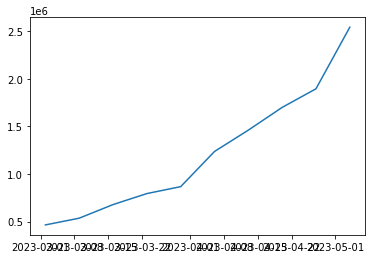

In [95]:
plt.plot(diken)

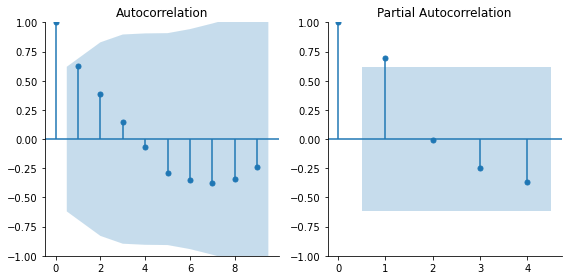

In [96]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(diken, lags=9, ax=ax[0])
sm.graphics.tsa.plot_pacf(diken, lags=4, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

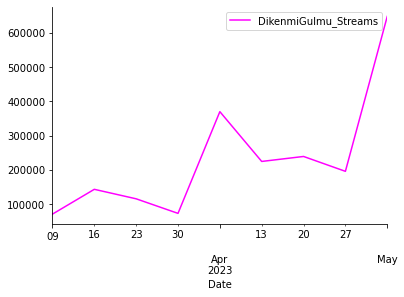

In [97]:
diff=diken-diken.shift(1)
diff=diff.dropna()
diff.plot(color='magenta')
sns.despine()
plt.show()

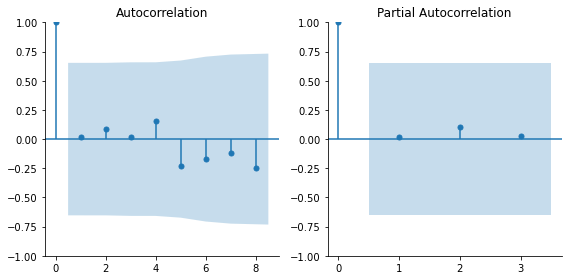

In [98]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(diff, lags=8, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff, lags=3, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [99]:
arima_model2 = sm.tsa.arima.ARIMA(diken, order=(0, 1, 0))  
fitted = arima_model2.fit()
fitted.summary()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     DikenmiGulmu_Streams   No. Observations:                   10
Model:                   ARIMA(0, 1, 0)   Log Likelihood                -125.928
Date:                  Tue, 09 May 2023   AIC                            253.856
Time:                          21:26:11   BIC                            254.053
Sample:                      03-02-2023   HQIC                           253.430
                           - 05-04-2023                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.457e+10   2.96e+10      2.518      0.012    1.65e+10    1.33e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.44
Prob(Q):                              0.95   Prob(JB):                         0.18
Heteroskedasticity (H):              13.24   Skew:                             1.41
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
forecast2=fitted.predict(start=10,end=12,dynamic=True)
forecast2

2023-05-11    2543606.0
2023-05-18    2543606.0
2023-05-25    2543606.0
Freq: W-THU, Name: predicted_mean, dtype: float64

In [101]:
arima_model1=pm.auto_arima(diken,stepwise=True, seasonal=False)
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -141.698
Date:                Tue, 09 May 2023   AIC                            287.396
Time:                        21:26:12   BIC                            288.001
Sample:                    03-02-2023   HQIC                           286.732
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9869      0.025     38.981      0.000       0.937       1.037
sigma2      8.256e+10   9.68e-15   8.53e+24      0.000    8.26e+10    8.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 4.51
Prob(Q):                              0.69   Prob(JB):                         0.10
Heteroskedasticity (H):              16.60   Skew:                             1.49
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.53e+42. Standard errors may be unstable.
"""

In [102]:
h=3
forecast = arima_model1.predict(h)
forecast

2023-05-11    2.510291e+06
2023-05-18    2.477413e+06
2023-05-25    2.444965e+06
Freq: W-THU, dtype: float64

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  

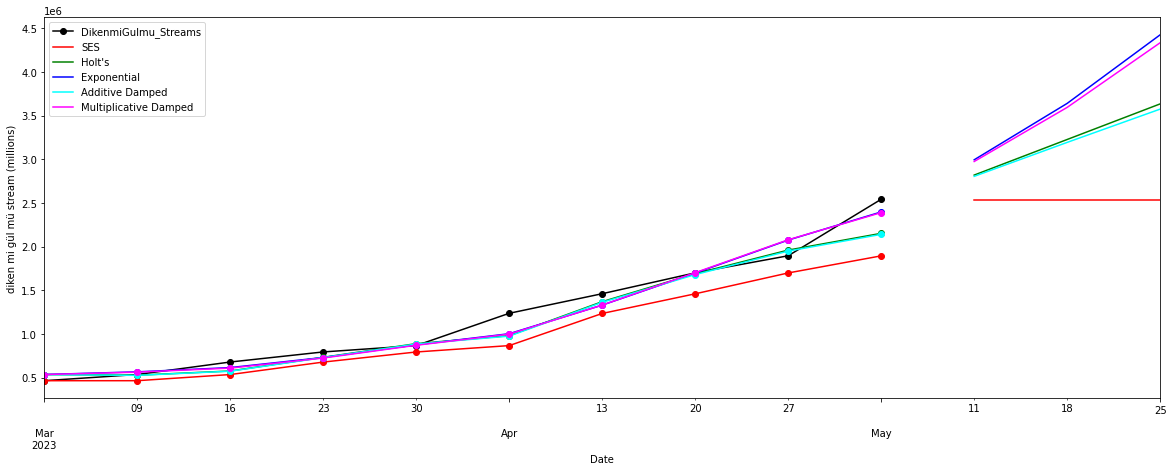

In [103]:
fit1 = SimpleExpSmoothing(diken).fit()
fcast1 = fit1.forecast(3).rename("SES")
fit2 = Holt(diken).fit()
fcast2 = fit2.forecast(3).rename("Holt's")
fit3 = Holt(diken, exponential=True).fit()
fcast3 = fit3.forecast(3).rename("Exponential")
fit4 = Holt(diken, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(3).rename("Additive Damped")
fit5 = Holt(diken, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(3).rename("Multiplicative Damped")

ax = diken.plot(color="black", marker="o", figsize=(20,7))
fit1.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast1.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast3.plot(ax=ax, color='blue', legend=True)
fit4.fittedvalues.plot(marker='o', ax=ax, color='cyan')
fcast4.plot(ax=ax, color='cyan', legend=True)
fit5.fittedvalues.plot(marker='o', ax=ax, color='magenta')
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('diken mi gül mü stream (millions)')
plt.show()

In [104]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","RSSE","AIC"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + np.sqrt([fit1.sse]).tolist() + [fit1.aic]
results["Holt's"] =         [fit2.params[p] for p in params] + np.sqrt([fit2.sse]).tolist() + [fit2.aic]
results["Exponential"] =    [fit3.params[p] for p in params] + np.sqrt([fit3.sse]).tolist() + [fit3.aic]
results["Additive"] =       [fit4.params[p] for p in params] + np.sqrt([fit4.sse]).tolist() + [fit4.aic]
results["Multiplicative"] = [fit5.params[p] for p in params] + np.sqrt([fit5.sse]).tolist() + [fit5.aic]
results.round(2)

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.0,0.66,0.45,0.66,0.45
$\beta$,NaN,0.66,0.40,0.66,0.45
$\phi$,NaN,NaN,NaN,0.98,0.99
$l_0$,464919.0,464919.00,464919.00,464919.00,464919.00
$b_0$,NaN,70847.00,1.15,70847.00,1.16
RSSE,865713.3,500696.27,373353.72,513158.86,381962.03
AIC,254.4,247.45,241.58,249.94,244.04


In [ ]:
fcast1 = fit1.forecast(1).rename("SES")
fcast2 = fit2.forecast(1).rename("Holt's")
fcast3 = fit3.forecast(1).rename("Exponential")
fcast4 = fit4.forecast(1).rename("Additive Damped")
fcast5 = fit5.forecast(1).rename("Multiplicative Damped")
print("SES forecast:", fcast1)
print("Holt's forecast:", fcast2)
print("Exponential:", fcast3)
print("Additive Damped forecast:", fcast4)
print("Multiplicative Damped forecast:", fcast5)

# TALİBANA

In [105]:
talibana=pd.read_excel('SongStreamForecast.xlsx','Talibana', index_col='Date', parse_dates=True)
talibana

,Talibana_Streams
Date,
2022-12-29,2334139
2023-01-05,2873589
2023-01-12,3300941
2023-01-19,3731030
2023-01-26,3622491
2023-02-02,0
2023-02-09,325551
2023-02-16,1236045
2023-02-23,1853946


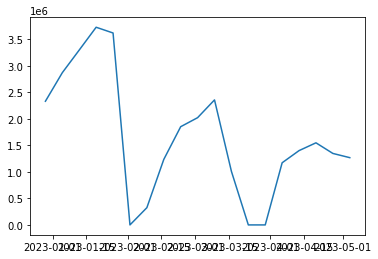

In [106]:
plt.plot(talibana)

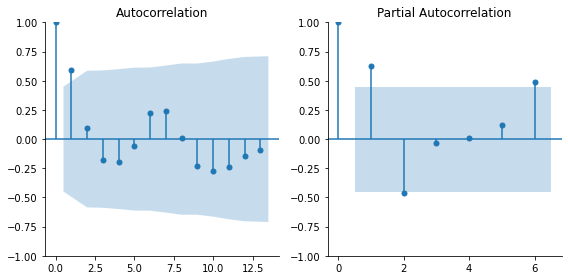

In [107]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(talibana, lags=13, ax=ax[0])
sm.graphics.tsa.plot_pacf(talibana, lags=6, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

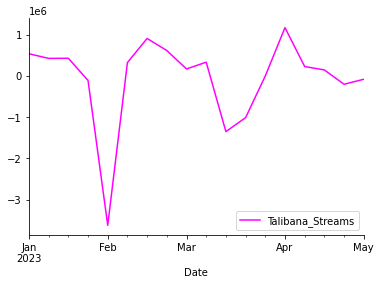

In [108]:
diff=talibana-talibana.shift(1)
diff=diff.dropna()
diff.plot(color='magenta')
sns.despine()
plt.show()

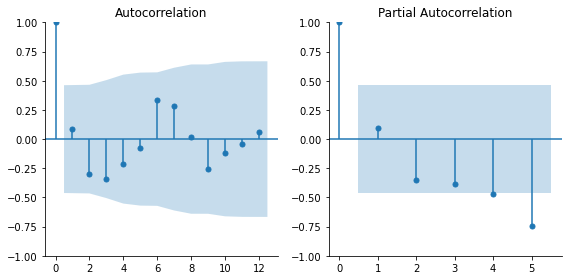

In [109]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(diff, lags=12, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff, lags=5, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [119]:
arima_model2 = sm.tsa.arima.ARIMA(talibana, order=(1, 1, 0))  
fitted = arima_model2.fit()
fitted.summary()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Talibana_Streams   No. Observations:                   19
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -274.820
Date:                Tue, 09 May 2023   AIC                            553.640
Time:                        21:44:40   BIC                            555.421
Sample:                    12-29-2022   HQIC                           553.886
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1223      0.353      0.347      0.729      -0.569       0.814
sigma2      1.125e+12   5.85e-14   1.93e+25      0.000    1.13e+12    1.13e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                33.94
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -2.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.06e+41. Standard errors may be unstable.
"""

In [120]:
forecast2=fitted.predict(start=19,end=22,dynamic=True)
forecast2

2023-05-11    1.259712e+06
2023-05-18    1.258520e+06
2023-05-25    1.258374e+06
2023-06-01    1.258356e+06
Freq: W-THU, Name: predicted_mean, dtype: float64

In [112]:
arima_model1=pm.auto_arima(talibana,stepwise=True, seasonal=False)
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -286.567
Date:                Tue, 09 May 2023   AIC                            581.134
Time:                        21:39:45   BIC                            584.912
Sample:                    12-29-2022   HQIC                           581.773
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.752e+05      7e+05      1.251      0.211   -4.96e+05    2.25e+06
ar.L1          0.8036      0.244      3.287      0.001       0.324       1.283
ar.L2         -0.3489      0.306     -1.141      0.254      -0.948       0.250
sigma2      7.362e+11      0.809    9.1e+11      0.000    7.36e+11    7.36e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.95
Prob(Q):                              0.97   Prob(JB):                         0.03
Heteroskedasticity (H):               0.06   Skew:                            -1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.98e+27. Standard errors may be unstable.
"""

In [113]:
h=3
forecast = arima_model1.predict(h)
forecast

2023-05-11    1.424572e+06
2023-05-18    1.577016e+06
2023-05-25    1.645399e+06
Freq: W-THU, dtype: float64

In [124]:
fit1 = SimpleExpSmoothing(talibana).fit()
fcast1 = fit1.forecast(3).rename("SES")
fit2 = Holt(talibana).fit()
fcast2 = fit2.forecast(3).rename("Holt's")
#fit3 = Holt(talibana, exponential=True).fit()
#fcast3 = fit3.forecast(3).rename("Exponential")
fit4 = Holt(talibana, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(3).rename("Additive Damped")
#fit5 = Holt(talibana, exponential=True, damped=True).fit()
#fcast5 = fit5.forecast(3).rename("Multiplicative Damped")

ax = talibana.plot(color="black", marker="o", figsize=(20,7))
fit1.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast1.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(ax=ax, color='green', legend=True)
##fit3.fittedvalues.plot(marker='o', ax=ax, color='blue')
#fcast3.plot(ax=ax, color='blue', legend=True)
fit4.fittedvalues.plot(marker='o', ax=ax, color='cyan')
f#cast4.plot(ax=ax, color='cyan', legend=True)
##fit5.fittedvalues.plot(marker='o', ax=ax, color='magenta')
#fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('talibana stream (millions)')
plt.show()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  

ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

In [121]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","RMSE","AIC"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + np.sqrt([fit1.sse]).tolist() + [fit1.aic]
results["Holt's"] =         [fit2.params[p] for p in params] + np.sqrt([fit2.sse]).tolist() + [fit2.aic]
#results["Exponential"] =    [fit3.params[p] for p in params] + np.sqrt([fit3.sse]).tolist() + [fit3.aic]
results["Additive"] =       [fit4.params[p] for p in params] + np.sqrt([fit4.sse]).tolist() + [fit4.aic]
#results["Multiplicative"] = [fit5.params[p] for p in params] + np.sqrt([fit5.sse]).tolist() + [fit5.aic]
results.round(2)

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.00,1.00,0.45,1.00,0.45
$\beta$,NaN,0.09,0.40,0.07,0.45
$\phi$,NaN,NaN,NaN,0.98,0.99
$l_0$,2334139.00,2281710.20,464919.00,2334139.00,464919.00
$b_0$,NaN,-142124.40,1.15,539450.00,1.16
RMSE,4428033.07,4611677.49,373353.72,4778257.78,381962.03
AIC,529.59,535.13,241.58,538.48,244.04


In [125]:
fcast1 = fit1.forecast(1).rename("SES")
fcast2 = fit2.forecast(1).rename("Holt's")
fcast3 = fit3.forecast(1).rename("Exponential")
fcast4 = fit4.forecast(1).rename("Additive Damped")
fcast5 = fit5.forecast(1).rename("Multiplicative Damped")
print("SES forecast:", fcast1)
print("Holt's forecast:", fcast2)
#print("Exponential:", fcast3)
print("Additive Damped forecast:", fcast4)
#print("Multiplicative Damped forecast:", fcast5)

SES forecast: 2023-05-11    1.269861e+06
Freq: W-THU, Name: SES, dtype: float64
Holt's forecast: 2023-05-11    1.215036e+06
Freq: W-THU, Name: Holt's, dtype: float64
Additive Damped forecast: 2023-05-11    1.336617e+06
Freq: W-THU, Name: Additive Damped, dtype: float64


# 10MG

In [126]:
mg=pd.read_excel('SongStreamForecast.xlsx','10MG', index_col='Date', parse_dates=True)
mg

,10MG_Streams
Date,
2022-11-24,4438414
2022-12-01,4295655
2022-12-08,3549188
2022-12-15,2985225
2022-12-22,2514932
2022-12-29,2296712
2023-01-05,2117164
2023-01-12,2112048
2023-01-19,2210618


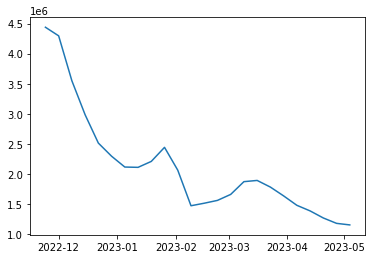

In [127]:
plt.plot(mg)

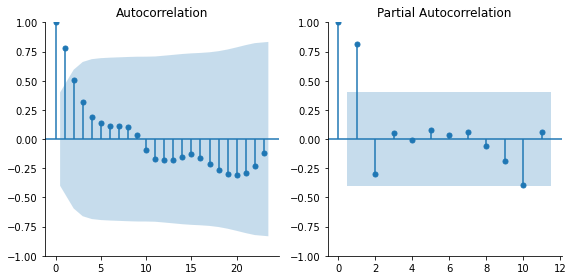

In [128]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(mg, lags=23, ax=ax[0])
sm.graphics.tsa.plot_pacf(mg, lags=11, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

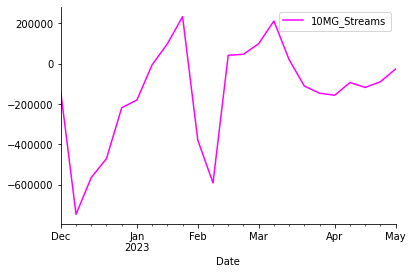

In [129]:
diff=mg-mg.shift(1)
diff=diff.dropna()
diff.plot(color='magenta')
sns.despine()
plt.show()

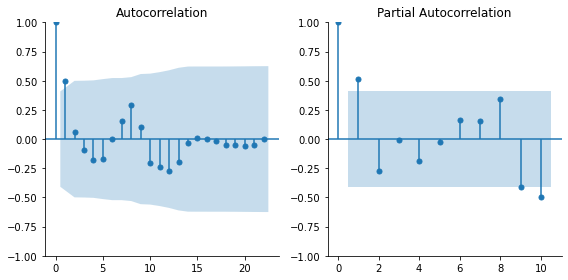

In [130]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sm.graphics.tsa.plot_acf(diff, lags=22, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff, lags=10, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

In [131]:
arima_model2 = sm.tsa.arima.ARIMA(mg, order=(1, 0, 1))  
fitted = arima_model2.fit()
fitted.summary()

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           10MG_Streams   No. Observations:                   24
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -332.087
Date:                Tue, 09 May 2023   AIC                            672.173
Time:                        21:52:50   BIC                            676.885
Sample:                    11-24-2022   HQIC                           673.423
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.122e+06   2.31e-09   9.18e+14      0.000    2.12e+06    2.12e+06
ar.L1          0.9650      0.023     41.290      0.000       0.919       1.011
ma.L1          0.7407      0.102      7.242      0.000       0.540       0.941
sigma2      3.591e+10   3.49e-13   1.03e+23      0.000    3.59e+10    3.59e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.93
Prob(Q):                              0.64   Prob(JB):                         0.38
Heteroskedasticity (H):               0.07   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.79e+38. Standard errors may be unstable.
"""

In [132]:
forecast2=fitted.predict(start=24,end=27,dynamic=True)
forecast2

2023-05-11    1.165994e+06
2023-05-18    1.199458e+06
2023-05-25    1.231749e+06
2023-06-01    1.262910e+06
Freq: W-THU, Name: predicted_mean, dtype: float64

In [133]:
arima_model1=pm.auto_arima(mg,stepwise=False, seasonal=False)
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -309.538
Date:                Tue, 09 May 2023   AIC                            629.077
Time:                        21:52:52   BIC                            634.754
Sample:                    11-24-2022   HQIC                           630.505
                         - 05-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.982e+04   2.72e+04     -2.198      0.028   -1.13e+05   -6469.656
ar.L1          0.6160      0.164      3.747      0.000       0.294       0.938
ar.L2         -0.1726      0.070     -2.477      0.013      -0.309      -0.036
ma.L1         -0.6402      0.195     -3.279      0.001      -1.023      -0.258
sigma2      2.923e+10      0.012   2.54e+12      0.000    2.92e+10    2.92e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.92   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.17   Prob(JB):                         0.46
Heteroskedasticity (H):               0.50   Skew:                            -0.53
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.33e+28. Standard errors may be unstable.
"""

In [134]:
h=3
forecast = arima_model1.predict(h)
forecast

2023-05-11    1.041464e+06
2023-05-18    9.154829e+05
2023-05-25    7.978498e+05
Freq: W-THU, dtype: float64

C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\fatmanurh.ZHCORP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  

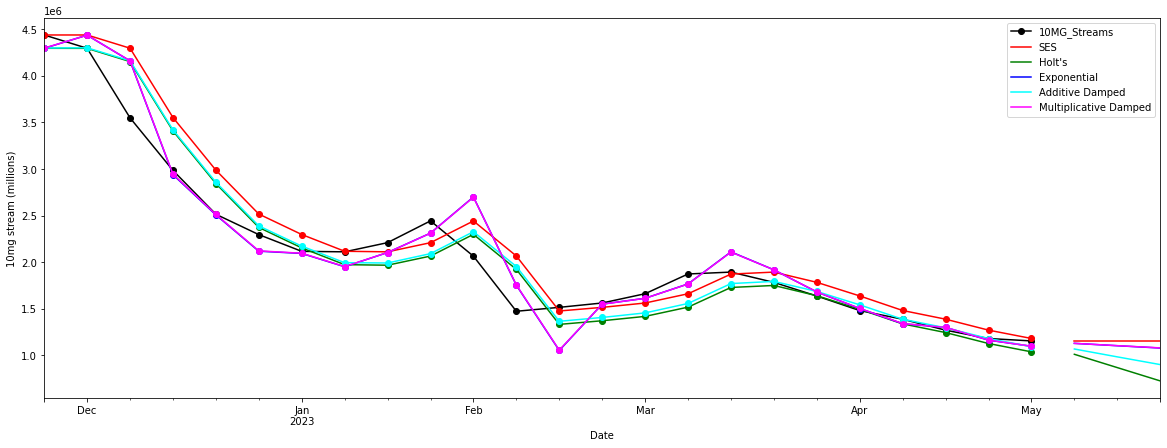

In [135]:
fit1 = SimpleExpSmoothing(mg).fit()
fcast1 = fit1.forecast(3).rename("SES")
fit2 = Holt(mg).fit()
fcast2 = fit2.forecast(3).rename("Holt's")
fit3 = Holt(mg, exponential=True).fit()
fcast3 = fit3.forecast(3).rename("Exponential")
fit4 = Holt(mg, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(3).rename("Additive Damped")
fit5 = Holt(mg, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(3).rename("Multiplicative Damped")

ax = mg.plot(color="black", marker="o", figsize=(20,7))
fit1.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast1.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='green')
fcast2.plot(ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast3.plot(ax=ax, color='blue', legend=True)
fit4.fittedvalues.plot(marker='o', ax=ax, color='cyan')
fcast4.plot(ax=ax, color='cyan', legend=True)
fit5.fittedvalues.plot(marker='o', ax=ax, color='magenta')
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('10mg stream (millions)')
plt.show()

In [136]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","RSSE","AIC"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + np.sqrt([fit1.sse]).tolist() + [fit1.aic]
results["Holt's"] =         [fit2.params[p] for p in params] + np.sqrt([fit2.sse]).tolist() + [fit2.aic]
results["Exponential"] =    [fit3.params[p] for p in params] + np.sqrt([fit3.sse]).tolist() + [fit3.aic]
results["Additive"] =       [fit4.params[p] for p in params] + np.sqrt([fit4.sse]).tolist() + [fit4.aic]
results["Multiplicative"] = [fit5.params[p] for p in params] + np.sqrt([fit5.sse]).tolist() + [fit5.aic]
results.round(2)

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.00,1.00,1.00,1.00,1.00
$\beta$,NaN,0.00,1.00,0.00,1.00
$\phi$,NaN,NaN,NaN,0.98,0.99
$l_0$,4438414.00,4438414.00,4438414.00,4438414.00,4438414.00
$b_0$,NaN,-142759.00,0.97,-142759.00,0.98
RSSE,1383319.56,1208722.93,1133856.35,1188397.21,1130776.84
AIC,606.45,603.97,600.90,605.16,602.77


In [137]:
fcast1 = fit1.forecast(1).rename("SES")
fcast2 = fit2.forecast(1).rename("Holt's")
fcast3 = fit3.forecast(1).rename("Exponential")
fcast4 = fit4.forecast(1).rename("Additive Damped")
fcast5 = fit5.forecast(1).rename("Multiplicative Damped")
print("SES forecast:", fcast1)
print("Holt's forecast:", fcast2)
print("Exponential:", fcast3)
print("Additive Damped forecast:", fcast4)
print("Multiplicative Damped forecast:", fcast5)

SES forecast: 2023-05-11    1.156272e+06
Freq: W-THU, Name: SES, dtype: float64
Holt's forecast: 2023-05-11    1.012810e+06
Freq: W-THU, Name: Holt's, dtype: float64
Exponential: 2023-05-11    1.129998e+06
Freq: W-THU, Name: Exponential, dtype: float64
Additive Damped forecast: 2023-05-11    1.069652e+06
Freq: W-THU, Name: Additive Damped, dtype: float64
Multiplicative Damped forecast: 2023-05-11    1.130261e+06
Freq: W-THU, Name: Multiplicative Damped, dtype: float64
